In [1]:
import numpy as np
import os
import cv2 as cv
from matplotlib import pyplot as plt
import pickle

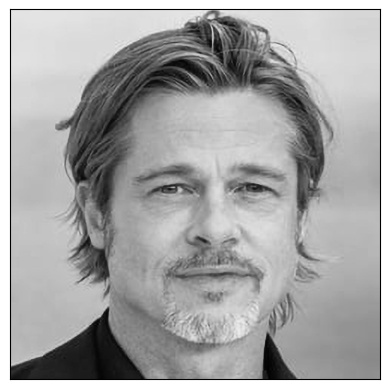

In [2]:
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

img_BGR = cv.imread('images/BradPitt.jpg')
img_RGB = cv.cvtColor(img_BGR, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_BGR, cv.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray') # open the image as gray
plt.xticks([]),plt.yticks([])
plt.show()

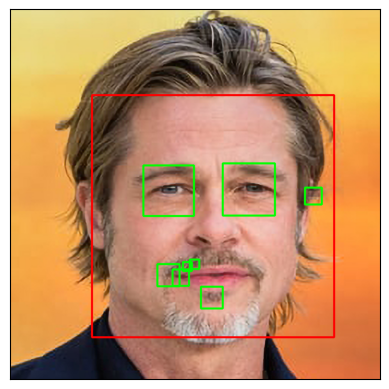

In [3]:
# Simple code
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)

for (x,y,w,h) in faces:
    img_RGB = cv.rectangle(img_RGB,(x,y),(x+w,y+h),(255,0,0),4)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img_RGB[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),4)

plt.imshow(img_RGB) # open the image as gray
plt.xticks([]),plt.yticks([])
plt.show()

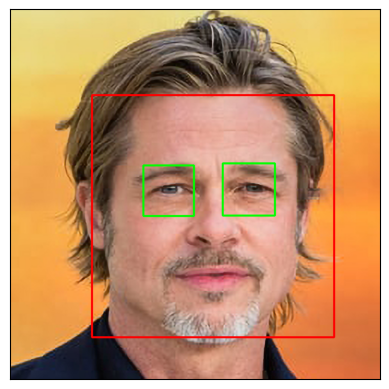

In [6]:
# Improved code!

face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

img_BGR = cv.imread('images/BradPitt.jpg')
img_RGB = cv.cvtColor(img_BGR, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_BGR, cv.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)

for (x, y, w, h) in faces:
  # Create a red square identifying where the face is
  img_RGB = cv.rectangle(img_RGB, (x, y), (x + w, y + h), (255, 0, 0), 4)
  roi_gray = img_gray[y:y + h, x:x + w]
  roi_color = img_RGB[y:y + h, x:x + w]

  # Find all eyes
  eyes = eye_cascade.detectMultiScale(roi_gray)

  # Sort eyes by area (descending) and pick the top 2
  eyes = sorted(eyes, key=lambda eye: eye[2] * eye[3], reverse=True)[:2]  

  for (ex, ey, ew, eh) in eyes:
    cv.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 4)

plt.imshow(img_RGB)  # open the image as gray
plt.xticks([]), plt.yticks([])
plt.show()